<a href="https://colab.research.google.com/github/SinghReena/MachineLearning/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification with Iris dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

new_df = pd.read_csv(url, header=None)

In [3]:
new_df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
new_df.columns = ["sepal length","sepal width","petal length","petal width","species"]
new_df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
new_df.columns = ["sepal length","sepal width","petal length","petal width","species"]
new_df


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
new_df["species"]=new_df['species'].str.replace('Iris-','')
new_df



,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


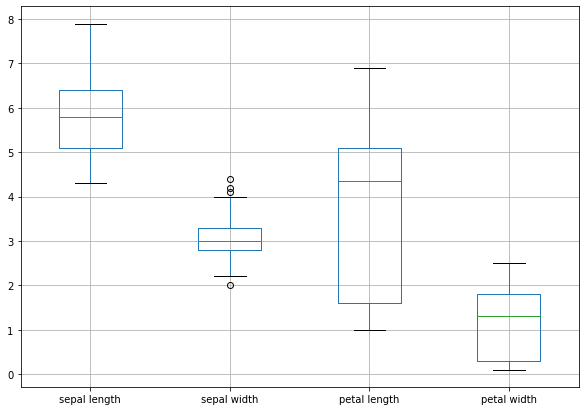

In [7]:
plt.figure(figsize =(10,7))
new_df.boxplot()

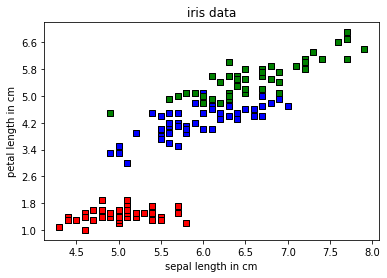

In [8]:
my_colors = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}
color_series = new_df["species"].map(my_colors)
x = new_df["sepal length"]
y= new_df["petal length"]
plt.xlabel("sepal length in cm")
plt.ylabel("petal length in cm")
plt.title("iris data")
plt.yticks(ticks=np.arange(1, 7,0.8))
plt.scatter(x,y, color = color_series, marker="s", edgecolors="black")

## Logistic regression

In [9]:
from sklearn.model_selection import train_test_split
df_Y = new_df['species']
df_X = new_df.loc[:, ['sepal length', 'sepal width', 'petal length', 'petal width']]

df_X_train, df_X_test, df_Y_train, df_Y_test = train_test_split(df_X, df_Y, test_size=0.25, random_state=1)


In [10]:
len(df_X_train), len(df_X_test)

(112, 38)

In [11]:

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

model_L = LogisticRegression()


model_L.fit(df_X_train, df_Y_train.values)

# make predictions
expected = df_Y_test
predicted = model_L.predict(df_X_test)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
cm_L = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix: \n", cm_L)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

Confusion matrix: 
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [12]:
def plot_cm(cm):   
    species = ["setosa","virginica","versicolor"]
    df_cm = pd.DataFrame(cm, index=species, columns=species)
    fig = plt.figure(figsize=(5,5))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap="YlGnBu",linecolor="blue",linewidths=1.0)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

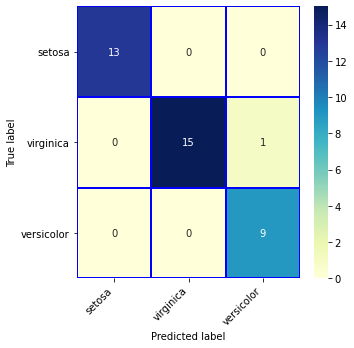

In [13]:
plot_cm(cm_L)

## ROC and AUC



In [14]:
# code from https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics
import numpy as np
from sklearn.metrics import roc_curve
y      = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)
print("fpr ", fpr)
#array([0. , 0. , 0.5, 0.5, 1. ])
print("tpr ", tpr)
# array([0. , 0.5, 0.5, 1. , 1. ])
print("thresholds ", thresholds)
# array([1.8 , 0.8 , 0.4 , 0.35, 0.1 ])


fpr  [0.  0.  0.5 0.5 1. ]
tpr  [0.  0.5 0.5 1.  1. ]
thresholds  [1.8  0.8  0.4  0.35 0.1 ]


### Optional: Precision and Recall

In [15]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve([-1, -1, 1, 1], scores) 
#retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

In [16]:
print(precision, recall, thresholds)

[0.66666667 0.5        1.         1.        ] [1.  0.5 0.5 0. ] [0.35 0.4  0.8 ]


In [17]:
pr_auc

0.7916666666666666

### AUC for Iris dataset

In [18]:
model_L.predict_proba(df_X_test)


array([[9.83716300e-01, 1.62836654e-02, 3.41577982e-08],
       [2.82443577e-01, 7.14359069e-01, 3.19735415e-03],
       [6.53151388e-03, 8.81912656e-01, 1.11555830e-01],
       [9.84580421e-01, 1.54194820e-02, 9.71942588e-08],
       [1.39832767e-06, 2.11216299e-02, 9.78876972e-01],
       [4.63866230e-03, 6.17062465e-01, 3.78298873e-01],
       [1.60921143e-04, 1.35392381e-01, 8.64446697e-01],
       [9.56496635e-01, 4.35015806e-02, 1.78458008e-06],
       [9.69276606e-01, 3.07229364e-02, 4.57341115e-07],
       [1.12663518e-05, 2.96524714e-02, 9.70336262e-01],
       [1.99447265e-02, 8.68303761e-01, 1.11751513e-01],
       [9.64948961e-01, 3.50503845e-02, 6.54878676e-07],
       [5.53769518e-06, 3.37364427e-02, 9.66258020e-01],
       [7.35156803e-03, 7.91653776e-01, 2.00994656e-01],
       [7.24883434e-03, 7.36125110e-01, 2.56626056e-01],
       [9.87869444e-01, 1.21304539e-02, 1.02380560e-07],
       [2.37548041e-02, 9.30573504e-01, 4.56716919e-02],
       [1.12870101e-02, 6.64901

In [19]:
from sklearn.metrics import roc_auc_score
roc_auc_score(df_Y_test, model_L.predict_proba(df_X_test), multi_class='ovr')

1.0

In [20]:
#@title  ROC for Iris dataset (imcomplete)
# code from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
# to be completed here.
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

NameError: ignored

## Naive Bayes

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


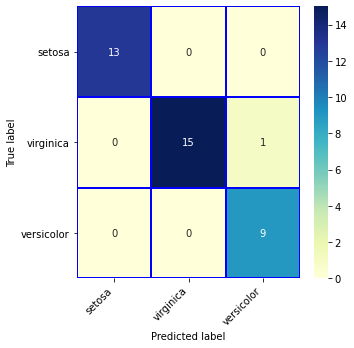

In [21]:
## Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model_L.fit(df_X_train, df_Y_train.values)

# make predictions
expected = df_Y_test
predicted = model_L.predict(df_X_test)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)
plot_cm(cm)

## LDA

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_curve, roc_auc_score, f1_score


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        16
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


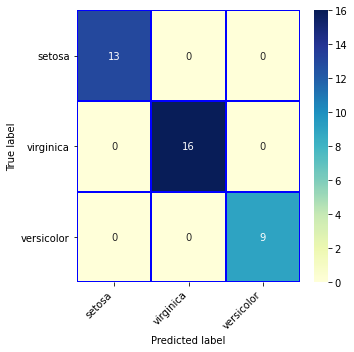

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model  = LinearDiscriminantAnalysis()
model.fit(df_X_train, df_Y_train.values)

# make predictions
expected = df_Y_test
predicted = model.predict(df_X_test)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)
plot_cm(cm)

# KNN

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        16
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


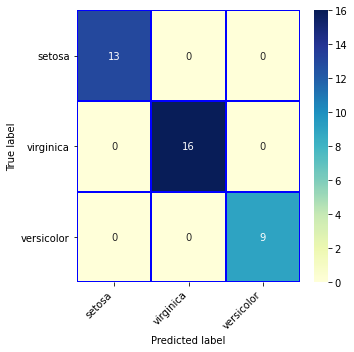

In [24]:
# Knn- classification
# k-Nearest Neighbor Classification
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(df_X_train, df_Y_train.values)

# make predictions
expected = df_Y_test
predicted = model.predict(df_X_test)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)
plot_cm(cm)

# SVM

There are two methods we can use for SVM. `SVC` implements a 'one-vs-one' strategy, so it will create ``n_classes * (n_classes - 1) / 2`` classifiers and the training is done from the data for each pair of classes.

On the other hand, `LinearSVC` implements 'one-vs-the-rest multi-class strategy. So it trains `n_classes` models only.

In [25]:
def fit_and_results(model):
  model.fit(df_X_train, df_Y_train.values)

  # make predictions
  expected = df_Y_test
  predicted = model.predict(df_X_test)

  # summarize the fit of the model
  print(metrics.classification_report(expected, predicted))
  print(metrics.confusion_matrix(expected, predicted))
  cm = metrics.confusion_matrix(expected, predicted)
  plot_cm(cm)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


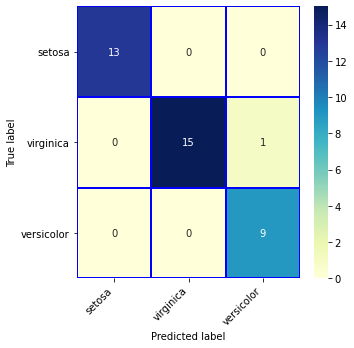

In [26]:
from sklearn import svm

fit_and_results(svm.SVC())

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.81      0.90        16
   virginica       0.75      1.00      0.86         9

    accuracy                           0.92        38
   macro avg       0.92      0.94      0.92        38
weighted avg       0.94      0.92      0.92        38

[[13  0  0]
 [ 0 13  3]
 [ 0  0  9]]


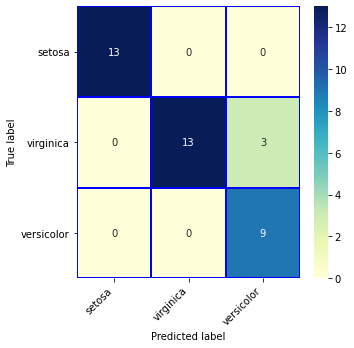

In [27]:
from sklearn import svm

fit_and_results(svm.LinearSVC(C = 2))